Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 4

## Assignment
- [ ] If you haven't yet, [review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Plot a confusion matrix for your Tanzania Waterpumps model.
- [ ] Continue to participate in our Kaggle challenge. Every student should have made at least one submission that scores at least 60% accuracy (above the majority class baseline).
- [ ] Submit your final predictions to our Kaggle competition. Optionally, go to **My Submissions**, and _"you may select up to 1 submission to be used to count towards your final leaderboard score."_
- [ ] Commit your notebook to your fork of the GitHub repo.
- [ ] Read [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.


## Stretch Goals

### Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)


### Doing
- [ ] Share visualizations in our Slack channel!
- [ ] RandomizedSearchCV / GridSearchCV, for model selection. (See module 3 assignment notebook)
- [ ] More Categorical Encoding. (See module 2 assignment notebook)
- [ ] Stacking Ensemble. (See below)

### Stacking Ensemble

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('/Users/user/documents/github/lambda/DS-Unit-2-Kaggle-Challenge/data/waterpumps/train_features.csv'), 
                 pd.read_csv('/Users/user/documents/github/lambda/DS-Unit-2-Kaggle-Challenge/data/waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('/Users/user/documents/github/lambda/DS-Unit-2-Kaggle-Challenge/data/waterpumps/test_features.csv')
sample_submission = pd.read_csv('/Users/user/documents/github/lambda/DS-Unit-2-Kaggle-Challenge/data/waterpumps/sample_submission.csv')

In [3]:
def df_valcounts(df):
    object_cols = df.select_dtypes(exclude='number')
    for col in object_cols:
        print(col)
        print(df[col].value_counts())

def h(dataframe,*args):
    return display(dataframe.head(*args),dataframe.shape)

def df_stats(dataframe):
    try:
        display(dataframe.shape,dataframe.head(),dataframe.isna().sum(),dataframe.dtypes,dataframe.count(),dataframe.describe(),dataframe.describe(exclude="number"))
    except:
        display(dataframe.shape,dataframe.head(),dataframe.isna().sum(),dataframe.dtypes,dataframe.count(),dataframe.describe())

def val_other(X):
    # When object columns values beyond the top 10 highest frequency, replace with "OTHER" value 
    object_cols = X.select_dtypes(exclude='number')
    for col in object_cols.columns:
        if X[col].nunique() >= 10:
            top10 = X[col].value_counts()[:10].index
            X.loc[~X[col].isin(top10), col] = "OTHER"
    return X
      

In [ ]:
#unused wrangle loop, could be worthwhile for sprint challenge

# def wrangle(X):
#     """Wrangle train, validate, and test sets in the same way"""
    
#     # Prevent SettingWithCopyWarning
#     X = X.copy()
    
#     # About 3% of the time, latitude has small values near zero,
#     # outside Tanzania, so we'll treat these values like zero.
#     X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
#     # When columns have zeros and shouldn't, they are like null values.
#     # So we will replace the zeros with nulls, and impute missing values later.
#     # Also create a "missing indicator" column, because the fact that
#     # values are missing may be a predictive signal.
#     cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
#                        'gps_height', 'population']
#     for col in cols_with_zeros:
#         X[col] = X[col].replace(0, np.nan)
#         X[col+'_MISSING'] = X[col].isnull()
            
#     # Drop duplicate columns
#     duplicates = ['quantity_group', 'payment_type']
#     X = X.drop(columns=duplicates)
    
#     # Drop recorded_by (never varies) and id (always varies, random)
#     unusable_variance = ['recorded_by', 'id']
#     X = X.drop(columns=unusable_variance)
    
#     # Convert date_recorded to datetime
#     X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
#     # Extract components from date_recorded, then drop the original column
#     X['year_recorded'] = X['date_recorded'].dt.year
#     X['month_recorded'] = X['date_recorded'].dt.month
#     X['day_recorded'] = X['date_recorded'].dt.day
#     X = X.drop(columns='date_recorded')
    
#     # Engineer feature: how many years from construction_year to date_recorded
#     X['years'] = X['year_recorded'] - X['construction_year']
#     X['years_MISSING'] = X['years'].isnull()
    
#     # return the wrangled dataframe
#     return X

# train = wrangle(train)
# test = wrangle(test)

# Utilizing Ordinal Encoding Here

In [23]:
#what could I do to provide more weighting to the higher recurring value here? Does ordinal encoding already address that?

train["quantity"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [56]:
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

import pandas_profiling
train.profile_report()

In [36]:
#attempted using GPU hardware acceleration, not going to function on my silly intel macbook GPU! Doh!



# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier
# import category_encoders as ce

# features = train.columns.drop(target)
# X_train = train[features]
# y_train = train[target]

# pipeline = make_pipeline(
#     ce.OrdinalEncoder(),
#     SimpleImputer(strategy='median'), 
# #     RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
#     XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='binary:logistic',
#                     silent=True, nthread=6, tree_method='gpu_hist', eval_metric='auc')
# )




# k = 10
# scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
#                          scoring='accuracy')
# print(f'Accuracy Scores for {k} folds:', scores)

In [20]:
#target attempt unsuccesful, back to ordinal, with impressive results!

%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
#     SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)



k = 10
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy')
print(f'Accuracy Scores for {k} folds:', scores)

Accuracy Scores for 10 folds: [0.81434102 0.81753913 0.81501431 0.80777647 0.82053872 0.80622896
 0.81784512 0.80838525 0.80451254 0.81458404]
CPU times: user 32.8 s, sys: 5.7 s, total: 38.5 s
Wall time: 1min 28s


In [24]:
scores.mean()

0.8126765554702604

In [22]:
#fitting to cross validation pipeline above after impressive scores. can use standalone or with randomcv for kaggle! either way!

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['date_recorded', 'funder', 'installer',
                                      'wpt_name', 'basin', 'subvillage',
                                      'region', 'lga', 'ward', 'public_meeting',
                                      'recorded_by', 'scheme_management',
                                      'scheme_name', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_t...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
   

In [14]:
#Printing Hyperparameters 

print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestclassifier'])

Model Hyperparameters:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [41]:
#remember that your winning combo here was niter 3 and cv 10!!#####

from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

param_distributions = {
#     'ordinalencoder__min_samples_leaf': randint(1, 1000), 
#     'ordinalencoder__smoothing': uniform(1, 1000), 
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}




search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=1, 
    cv=2, 
    scoring='accuracy', 
    verbose=3, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.8s finished


In [42]:
print('Best hyperparameters', search.best_params_)
print('Accuracy', search.best_score_)

Best hyperparameters {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5389995477048005, 'randomforestclassifier__n_estimators': 143, 'simpleimputer__strategy': 'median'}
Accuracy 0.765016835016835


In [45]:
pipeline.fit(X_train, y_train)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['date_recorded', 'funder', 'installer',
                                      'wpt_name', 'basin', 'subvillage',
                                      'region', 'lga', 'ward', 'public_meeting',
                                      'recorded_by', 'scheme_management',
                                      'scheme_name', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_t...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_le

In [46]:
X_test = test[features]

In [47]:
y_val = pipeline.predict(X_test)

In [48]:
submission = pd.DataFrame({'id':sample_submission['id'],'status_group':y_val})
submission.to_csv("submission6.csv",index=False)

In [ ]:
# Plotting Feature Importance After Running Random Search Cross Validation. Simple to apply to any model. Will require repeating certain pipelines steps. 

In [50]:
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)

X_train shape after encoding (59400, 40)


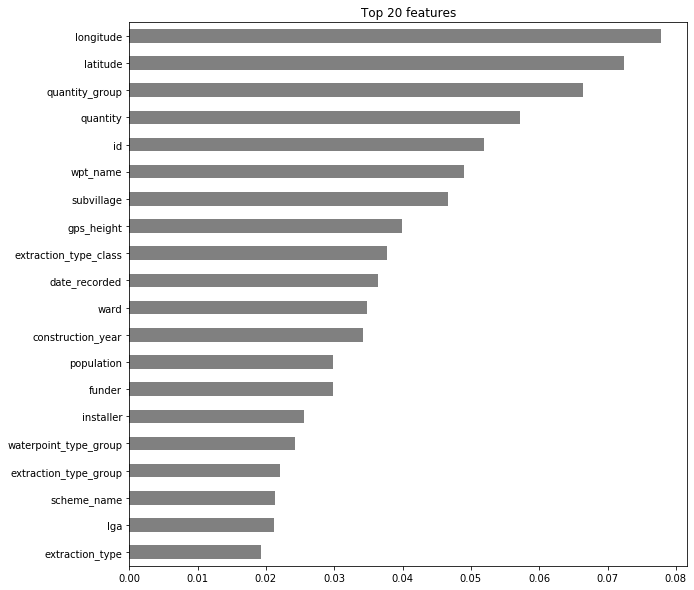

In [51]:
import matplotlib.pyplot as plt

# Get feature importances 

rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances

n = 20 
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color="grey");

# Plotting Confusion Matrix Now 

In [60]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier



# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

# Split train into train & val. Make val the same size as test.
target = 'status_group'
train, val = train_test_split(train, test_size=len(test),  
                              stratify=train[target], random_state=42)


# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test


#make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)


k = 10
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy')
print(f'Accuracy Scores for {k} folds:', scores)
print(f'Accuracy Mean Score: {scores.mean()}')

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

Accuracy Scores for 10 folds: [0.79582779 0.80044395 0.80754717 0.80643729 0.80506217 0.80572824
 0.80794849 0.81057073 0.8107928  0.81101488]
Accuracy Mean Score: 0.8061373511196972


In [61]:
# This is hard to read
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[7031,  152,  615],
       [ 571,  317,  155],
       [1162,   63, 4292]])

In [64]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_val)



array(['functional', 'functional needs repair', 'non functional'],
      dtype='<U23')

In [68]:
def plot_confusion_matrix(y_true,y_pred):
    labels = unique_labels(y_true)
    columns = [label for label in labels]
    index = [label for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=index)
    return table 

plot_confusion_matrix(y_val, y_pred)

functional  functional needs repair  non functional
functional                     7031                      152             615
functional needs repair         571                      317             155
non functional                 1162                       63            4292

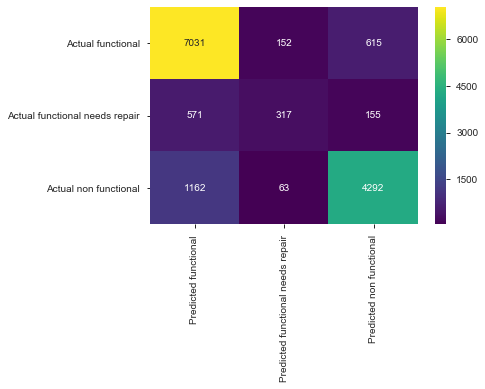

In [73]:
# 3. Plot a heatmap
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [87]:
# predictions 

correct = 7031+317+4292

print(f'correct predictions: {correct}')

correct predictions: 11640


In [82]:
total = 7031+571+1162+152+317+63+615+155+4292

print(f'total predictions: {total}')

total predictions: 14358


In [88]:
print(f'classification accuracy: {correct / total }')

classification accuracy: 0.8106978687839532


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

                         precision    recall  f1-score   support

             functional       0.80      0.90      0.85      7798
functional needs repair       0.60      0.30      0.40      1043
         non functional       0.85      0.78      0.81      5517

               accuracy                           0.81     14358
              macro avg       0.75      0.66      0.69     14358
           weighted avg       0.80      0.81      0.80     14358



In [90]:
y_train = y_train != 'functional'
y_val = y_val != 'functional'
y_train.value_counts(normalize=True)

False    0.543071
True     0.456929
Name: status_group, dtype: float64

In [94]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

In [95]:
# Discrete predictions look like this...
pipeline.predict(X_val)

array([ True,  True, False, ..., False, False, False])

In [96]:
# Predicted probabilities look like this...
pipeline.predict_proba(X_val)

array([[0.  , 1.  ],
       [0.3 , 0.7 ],
       [0.89, 0.11],
       ...,
       [0.86, 0.14],
       [0.59, 0.41],
       [0.97, 0.03]])

In [97]:
# Predicted probabilities *for the positive class* ...
pipeline.predict_proba(X_val)[:, 1]

array([1.  , 0.7 , 0.11, ..., 0.14, 0.41, 0.03])

In [98]:
pipeline.predict_proba(X_val)[:, 1] > 0.5

array([ True,  True, False, ..., False, False, False])

False    12143
True      2215
dtype: int64

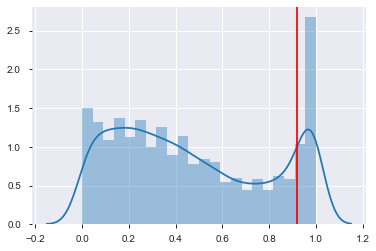

In [99]:
threshold = 0.92

y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.distplot(y_pred_proba)
ax.axvline(threshold, color='red')
pd.Series(y_pred).value_counts()

In [100]:
from ipywidgets import interact, fixed

def set_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
    y_pred = y_pred_proba > threshold
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.show()
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred)
    
interact(set_threshold, 
         y_true=fixed(y_val), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0,1,0.02));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [101]:
results = pd.DataFrame({'y_val': y_val, 'y_pred_proba': y_pred_proba})
top2000 = results.sort_values(by='y_pred_proba', ascending=False)[:2000]

In [102]:
top2000.sample(n=50)

y_val  y_pred_proba
3957    True          0.94
23463   True          0.97
44316   True          1.00
48955   True          1.00
8015    True          1.00
30129   True          1.00
46743   True          0.99
27967   True          0.96
43748   True          0.99
53862   True          0.94
44655   True          1.00
7812    True          0.98
1263    True          0.99
10547   True          1.00
12463   True          0.99
29258   True          0.99
17457   True          0.99
8569    True          0.99
2478    True          0.99
29774   True          0.95
59118   True          0.97
36348   True          0.98
31457   True          0.98
14911   True          0.95
42883   True          1.00
8991    True          1.00
41951   True          0.99
25387   True          0.98
43784   True          0.96
37406   True          0.98
330     True          0.98
24643   True          0.98
39538   True          1.00
12572   True          0.99
10915   True          0.95
24871   True          1.00
58069   True          0.99
19743   True          0.98
13024   True          0.94
16859  False          0.98
45023   True          1.00
22446   True          0.99
44839   True          0.94
38104   True          0.99
51823   True          0.99
32349   True          0.95
5787    True          0.99
29126   True          0.99
48547   True          0.99
6958    True          0.96

In [103]:
trips = 2000
print(f'Baseline: {trips * 0.46} waterpumps repairs in {trips} trips')

relevant_recommendations = top2000['y_val'].sum()
print(f'With model: Predict that {relevant_recommendations} waterpump repairs in {trips} trips')

Baseline: 920.0 waterpumps repairs in 2000 trips
With model: Predict that 1983 waterpump repairs in 2000 trips


In [104]:
precision_at_k2000 = relevant_recommendations / trips
print('Precision @ k=2000', precision_at_k2000)

Precision @ k=2000 0.9915
